# OpenCV Thresholding: ```cv2.threshold```

In this tutorial, you will learn how to use OpenCV and the ```cv2.threshold``` function to apply basic thresholding and Otsu thresholding.

Thresholding is one of the most common (and basic) segmentation techniques in computer vision and it allows us to separate the foreground (i.e., the objects that we are interested in) from the background of the image.

Thresholding comes in three forms:

1. We have __simple thresholding__ where we manually supply parameters to segment the image — this works extremely well in controlled lighting conditions where we can ensure high contrast between the foreground and background of the image.

1. We also have methods such as __Otsu’s thresholding__ that attempt to be more dynamic and automatically compute the optimal threshold value based on the input image.

1. And finally we have __adaptive thresholding__ which, instead of trying to threshold an image globally using a single value, instead breaks the image down into smaller pieces, and thresholds each of these pieces separately and individually.

We will be discussing simple thresholding and Otsu’s thresholding here today. Our next tutorial will cover adaptive thresholding in detail.

- [Reference](https://pyimagesearch.com/2021/04/28/opencv-thresholding-cv2-threshold/)
- [OpenCV2 reference](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html)

### OpenCV Thresholding ```cv2.threshold```

In the first part of this tutorial, we will discuss the concept of thresholding and how thresholding can help us segment images using OpenCV. From there we’ll configure our development environment and review our project directory structure.

Then two methods are shown to threshold an image using OpenCV:

1. __Basic thresholding__ where you have to manually supply a threshold value, T
1. __Otsu’s thresholding__, which automatically determines the threshold value

As a computer vision practitioner it’s critical that you understand how these methods work.

#### What is thresholding?

__Thresholding is the binarization of an image__. In general, __we seek to convert a grayscale image to a binary image, where the pixels are either 0 or 255__.

__A simple thresholding example would be selecting a threshold value _T_, and then setting all pixel intensities less than _T_ to 0, and all pixel values greater than _T_ to 255__. In this way, we are able to create a binary representation of the image.

In [1]:
import os
os.environ["OPENCV_IO_ENABLE_OPENEXR"] = "1"

import cv2
import OpenEXR
import Imath
from PIL import Image
import array
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

For example, take a look at the (grayscale) PyImageSearch logo below and its thresholded counterpart:

In [2]:
# Read image-
img = cv2.imread("/home/majumdar/Pictures/Screenshots/pyimagesearch_logo.png")

In [3]:
img.shape

(73, 315, 3)

In [6]:
# Convert colored image to gray-scale-
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [24]:
# Blur grayscaled image slightly-
'''
1. Apply a 7×7 Gaussian blur
2. Apply Gaussian blurring helps remove some of the high frequency edges in the image
that we are not concerned with and allow us to obtain a more 'clean' segmentation.
'''
img_blurred = cv2.GaussianBlur(img_gray, (7, 7), 0)

In [25]:
# Sanity check-
img.shape, img_gray.shape, img_blurred.shape

((73, 315, 3), (73, 315), (73, 315))

### Implementing simple thresholding with _OpenCV_

- Applying simple thresholding methods requires human intervention. __We must specify a threshold value ```T```. All pixel intensities below T are set to 255. And all pixel intensities greater than T are set to 0__.

- We could also __apply the _inverse_ of this binarization by setting all pixels greater than T to 255 and all pixel intensities below T to 0__.


#### ```cv2.threshold()```

Arguments include:

1. The first is the grayscale image that we wish to threshold. We supply our blurred/gray-scaled image as the first argument.

1. Then, we manually supply our ```T``` threshold value. We use a value of ```T=200```.

1. Our third argument is the output value applied during thresholding. __Any pixel intensity p that is greater than T is set to zero and any p that is less than T is set to the output value__.

- The ‘if’ statement test for “cv2.THRESH_BINARY_INV”:
```
dst(x, y) = 0, if src(x, y) > thresh; else maxval
```

_In our example, any pixel value that is greater than 200 is set to 0. Any value that is less than 200 is set to 255_. Finally, we must provide a thresholding method. We use the ```cv2.THRESH_BINARY_INV``` method, which indicates that pixel values p less than T are set to the output value (the third argument).

The cv2.threshold function then returns a tuple of 2 values: the first, ```T```, is the threshold value. In the case of simple thresholding, this value is trivial since we manually supplied the value of T in the first place. But __in the case of Otsu’s thresholding where T is dynamically computed for us__, it’s nice to have that value. The second returned value is the thresholded image itself.

But what if we wanted to perform the _reverse operation_, as:

- The ‘if’ statement test for “cv2.THRESH_BINARY”:
```
dst(x, y) = maxval, if src(x, y) > thresh; else 0
```

What if wanted to set all pixels p greater than T to the output value? Is that possible? Of course! And there are two ways to do it. The first method is to simply take the bitwise NOT of the output threshold image. But that adds an extra line of code.

In [34]:
# Apply thresholding-
# If pixel val > 200, set it to 255 (white)-
'''
Apply basic thresholding:

1. the first parameter is the gray-scaled image we want to threshold,
2. the second value is is our threshold to check if a pixel value is
greater than our threshold (in this case, 200),
3. we set it to be 'black', otherwise it is 'white'
'''
th, threshold = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY)

<Figure size 900x800 with 0 Axes>

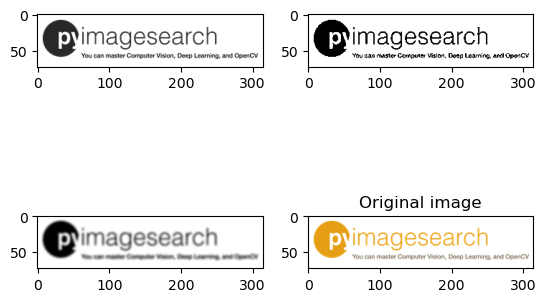

In [35]:
plt.figure(figsize = (9, 8))
f, axarr = plt.subplots(2, 2)
axarr[0, 0].imshow(img_gray, cmap = 'gray')
plt.title("Threshold example image")
axarr[0, 1].imshow(threshold, cmap = 'gray')
plt.title("Gray-scaled, blurred image")
axarr[1, 0].imshow(img_blurred, cmap = 'gray')
plt.title("Gray-scaled, blurred image")
axarr[1, 1].imshow(img, cmap = 'gray')
plt.title("Original image")


# plt.suptitle("OpenCV2 thresholding example")
plt.show()

On the _left_, we have the original PyImageSearch logo that has been converted to grayscale. And on the _right_, we have the thresholded, binary representation of the PyImageSearch logo.

__To construct this thresholded image simply set my threshold value ```T=200```. That way, _all pixels p in the logo where p > T are set to 255 (white), and all pixels p <= T are set to 0 (black)___.

By performing this thresholding you are able to segment the PyImageSearch logo from the background.

Normally, we use thresholding to focus on objects or areas of particular interest in an image. In the examples below, we will be using thresholding to detect coins in images, segment the pieces of the OpenCV logo, and separate license plate letters and characters from the license plate itself.

- In most cases __you are normally seeking your segmented objects to appear as white on a black background, hence using ```cv2.THRESH_BINARY_INV```. But in the case that you want your objects to appear as black on a white background, be sure to supply the ```cv2.THRESH_BINARY```flag__.

- The last task we are going to perform is to __reveal the foreground objects in the image and hide everything else__. The [image masking](https://pyimagesearch.com/2021/01/19/image-masking-with-opencv/) tutorial will come in handy here.

In [ ]:
# Visualize only the masked regions in the image-
'''
We supply our original input image as the first two arguments, and then our inverted thresholded image as our mask.
Remember, a mask only considers pixels in the original image where the mask is greater than zero.
'''
# masked = cv2.bitwise_and(img, img, mask = threshInv)

Sometimes you might get outputs having some holes in them. This is because the thresholding test failed to pass — and thus we could not include that region of the object(s) in the output thresholded image. However, in case you get no such _holes_ — this indicats that the segmentation is (essentially) perfect.

Note: Realistically, this isn’t a problem. All that really matters is that we are able to obtain the contour or outline of the object(s). These small gaps inside the thresholded coin mask can be filled in using [morphological operations](https://pyimagesearch.com/2021/04/28/opencv-morphological-operations/) or contour methods.

- So __given that the thresholding worked perfectly in for a given object(s), why did it not work just as perfectly for the same or very similary object(s)?__ The answer is simple: __lighting conditions__.

- __While subtle, two (or more) images can be captured under different lighting conditions. And since we have manually supplied a thresholding value, there is no guarantee that this threshold value T is going to work from one image to the next in the presence of lighting changes__.

- _One method to combat this is to simply provide a threshold value T for each image you want to threshold. But that’s a serious problem, especially if we want our system to be dynamic and work under various lighting conditions_.

- __The solution is to use methods such as Otsu’s method and adaptive thresholding__ to aid us in obtaining better results.

Being able to segment an image into pieces is an extremely valuable skill to have. This will become more apparent you work with contours and use them to quantify and identify different objects in an image.

But for the time being, let’s move on to some more advanced thresholding techniques where we do not have to manually supply a value of T.

### Implementing Otsu thresholding with OpenCV

- In the previous section on simple thresholding we needed to manually supply a threshold value of T. _For simple images in controlled lighting conditions, it might be feasible for us to hardcode this value_.

- But __in real-world conditions where we do not have any a priori knowledge of the lighting conditions, we actually automatically compute an optimal value of T using Otsu’s method__.

- __Otsu’s method assumes that our image contains two classes of pixels: the background and the foreground__.

- Furthermore, __Otsu’s method makes the assumption that the grayscale histogram of our pixel intensities of our image is bi-modal__, which simply means that the histogram is two peaks.

For example, take a look at the following image of a prescription pill and its associated grayscale histogram:

Here's a **cat** for you <img src = "/home/majumdar/Pictures/Screenshots/Image-bimodal_exampe.png" width = 400 height = 400 />

In [40]:
from IPython.display import Image
Image(url= "/home/majumdar/Pictures/Screenshots/Image-bimodal_exampe.png", width=400, height=400)

Notice how the histogram clearly has two peaks — the first sharp peak corresponds to the uniform background color of the image, while the second peak corresponds to the pill region itself.

Refer to [image histograms blog post](https://pyimagesearch.com/2021/04/28/opencv-image-histograms-cv2-calchist/). But for the time being just understand that a histogram is simply a tabulation or a “counter” on the number of times a pixel value appears in the image.

- Based on the grayscale histogram, Otsu’s method then computes an optimal threshold value T such that the variance between the background and foreground peaks is minimal.

- However, Otsu’s method has no a priori knowledge of what pixels belong to the foreground and which pixels belong to the background — it’s simply trying to optimally separate the peaks of the histogram.

- We start by passing in the (gray-scaled) image that we want to threshold. But take a look at the second parameter — this is supposed to be our threshold value T. So why are we setting it to zero?

- Remember that Otsu’s method is going to automatically compute the optimal value of T for us! We could technically specify any value we wanted for this argument; however, the value of 0 here denotes a _don’t care_ parameter.

- The third argument is the output value of the threshold, provided the given pixel passes the threshold test.

- The last argument is one we need to pay extra special attention to.
    - Previously, we had supplied values of ```cv2.THRESH_BINARY``` or ```cv2.THRESH_BINARY_INV``` depending on what type of thresholding we wanted to perform.
    - But now we are passing in a second flag that is logically OR’d with the previous method. Notice that this method is ```cv2.THRESH_OTSU```, which obviously corresponds to Otsu’s thresholding method.

The ```cv2.threshold``` function will again return a tuple of 2 values for us: the threshold value T and the thresholded image itself.

In the previous section, the value of T returned was redundant and irrelevant — we already knew this value of T since we had to manually supply it. But now that we are using Otsu’s method for automatic thresholding, this value of T becomes interesting — we do not know what the optimal value of T is ahead of time, hence why we are using Otsu’s method to compute it for us.

Based on our input image, the optimal value of T is 191; therefore, any pixel p that is greater than 191 is set to 0, and any pixel less than 191 is set to 255 (since we supplied the ```cv2.THRESH_BINARY_INV``` flag).

In [43]:
# Apply Otsu's automatic thresholding which automatically determines the best threshold value-
(T, threshInv) = cv2.threshold(
    img_gray, 0, 255,
    cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

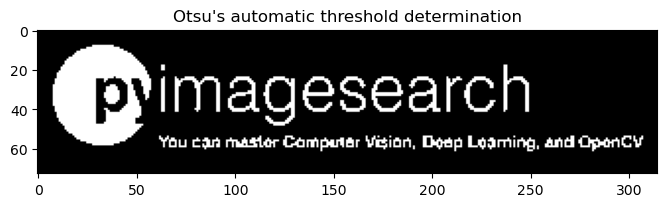

In [46]:
plt.figure(figsize = (8, 7))
plt.imshow(threshInv, cmap = 'gray')
plt.title("Otsu's automatic threshold determination")
plt.show()

In [45]:
print(f"otsu's thresholding value = {T}")

otsu's thresholding value = 196.0


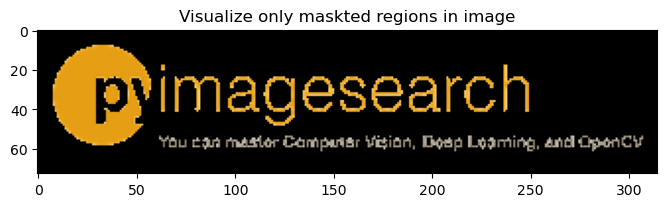

In [47]:
# Visualize only the masked regions in the image-
masked = cv2.bitwise_and(img, img, mask = threshInv)

plt.figure(figsize = (8, 7))
plt.imshow(masked)
plt.title("Visualize only maskted regions in image")
plt.show()

Let’s take a second and discuss __what is meant by the term _optimal_ here__. The value of T returned by Otsu’s method may not be optimal in visual investigation of our image — we might clearly see some gaps and holes in the coins of the thresholded image. But __this value is optimal in the sense that it does the best possible job to split the foreground and the background assuming a bi-modal distribution of grayscale pixel values__.

If the grayscale image does not follow a bi-modal distribution, then Otsu’s method will still run, but it may not give us our intended results. In that case, we will have to try adaptive thresholding.

- Otsu’s method can save us a lot of time guessing and checking the best value of T. However, there are some major drawbacks:
    - The first is that Otsu’s method assumes a bi-modal distribution of the grayscale pixel intensities of our input image. If this is not the case, then Otsu’s method can return sub-par results.
    - Secondly, Otsu’s method is a global thresholding method. In situations where lighting conditions are semi-stable and the objects we want to segment have sufficient contrast from the background, we might be able to get away with Otsu’s method.
    - But when the lighting conditions are non-uniform — such as when different parts of the image are illuminated more than others, we can run into some serious problem. And when that’s the case, we’ll need to rely on adaptive thresholding.

Refer for [Adaptive Thresholding with OpenCV (```cv2.adaptiveThreshold```)](https://pyimagesearch.com/2021/05/12/adaptive-thresholding-with-opencv-cv2-adaptivethreshold/)

### Summary:

- Here, we learned all about thresholding: what thresholding is, why we use thresholding, and how to perform thresholding using OpenCV and the ```cv2.threshold()``` function.

- We started by performing simple thresholding, which requires us to manually supply a value of T to perform the threshold. However, we quickly realized that manually supplying a value of T is very tedious and requires us to hardcode this value, implying that this method will not work in all situations.

- We then moved on to Otsu’s thresholding method, which automatically computes the optimal value of T for us, assuming a bi-modal distribution of the grayscale representation of our input image.

- The problem here is that
    - our input images need to be bi-modal for Otsu’s method to correctly segment the image, and 
    - Otsu’s method is a global thresholding method, which implies that we need to have at least some decent control over our lighting conditions.

In situations where our lighting conditions are less than ideal, or we simply cannot control them, we need adaptive thresholding (which is also known as local thresholding).